<a href="https://colab.research.google.com/github/tjhu/cs273a-proj/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS273A Final Project

Tianjiao Huang

Stella Lau

## Data exploration

### Label Exploration

We loaded the labels into a Pandas dataframe and have it describe the data. We plotted the histogram of the emotions and we found that the majority of them are neutral and happiness. 

In [2]:
!git clone https://github.com/muxspace/facial_expressions

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14214, done.
remote: Total 14214 (delta 0), reused 0 (delta 0), pack-reused 14214
Receiving objects: 100% (14214/14214), 239.65 MiB | 29.64 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Checking out files: 100% (13996/13996), done.


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pathlib

DATA_DIR = "facial_expressions/data"
IMAGE_DIR = "facial_expressions/images"

data = pd.read_csv(f'{DATA_DIR}/legend.csv')
data['emotion'] = data['emotion'].str.lower()
data.describe()

,user.id,image,emotion
count,13690,13690,13690
unique,5,13682,8
top,dwdii,Kimberly_Stewart_0001.jpg,neutral
freq,6667,2,6868


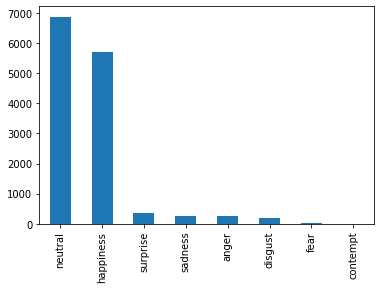

In [4]:
data['emotion'].value_counts().plot(kind='bar')
plt.show()

dwdii      6667
302        5598
jhamski     921
JN721       500
628           4
Name: user.id, dtype: int64


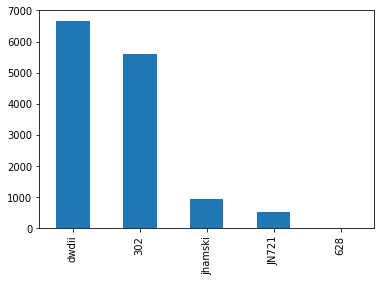

In [5]:
users = data['user.id'].value_counts()
user_names = users.index.tolist()
print(users)
users.plot(kind='bar')
plt.show()

### User ID

We plotted the histogram of the user.id and found that the majority of images were uploaded by users dwdii and 302. The users dwdii, 302, and JN721 uploads mostly pictures that are classified as neutral and happiness. The user jhamski uploads mostly pictures that are classified as happiness. The user 628 uploaded 4 images that are each classified as anger, surprise, disgust, and fear. And each user has their own preference of image size and the number of channels per image. However, we believe that our classifier should classify the emotion solely based on the image itself so we will __not__ use the `user.id` column as a feature.

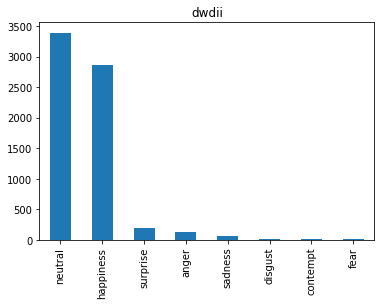

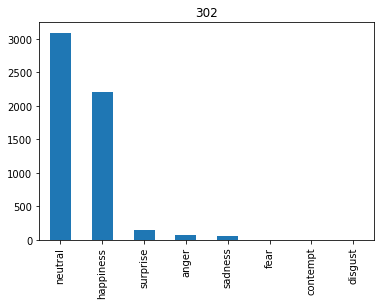

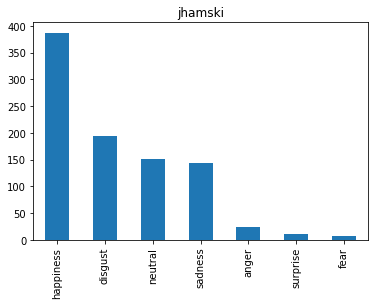

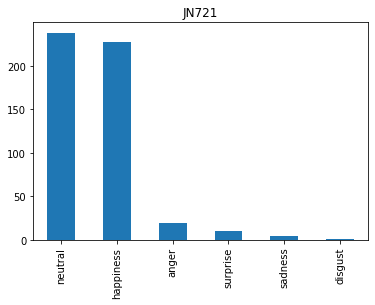

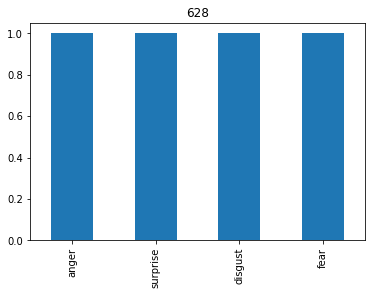

In [6]:
for user_name in user_names:
    user_data = data.loc[data['user.id'] == user_name]
    plt.figure()
    plt.title(user_name)
    user_data['emotion'].value_counts().plot(kind='bar')
    plt.show()

### Image Exploration

The images are mostly 350x350 grayscale single-channel images. We show a greyscale image and a color image from our dataset below.

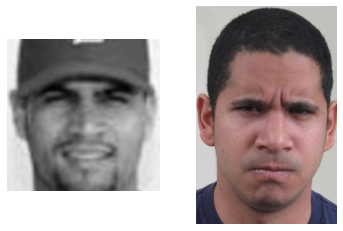

In [11]:
plt.subplot(1, 2, 1)
image = plt.imread(f'{IMAGE_DIR}/{data["image"][200]}')
plt.imshow(image, cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
image = plt.imread(f'{IMAGE_DIR}/{data["image"][0]}')
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()

Even though most of the image are the same size, there are 855 different image sizes in our data. To use the images as a features, we will have to rescale them and make them have the same number of channels. The table below shows the number of images per image size.

In [7]:
pd.Series([plt.imread(f'{IMAGE_DIR}/{path}').shape for path in data['image']]).value_counts()

(350, 350)       12765
(91, 73, 3)          4
(96, 70, 3)          3
(85, 64, 3)          3
(69, 53, 3)          3
                 ...  
(46, 35, 3)          1
(101, 90, 3)         1
(112, 64, 3)         1
(154, 119, 3)        1
(61, 52, 3)          1
Length: 855, dtype: int64

## Experiments

### Convolution Neural Network(CNN)

CNNs are very popular models for image classification. Since we treat facial expression classification as a specialized image classification, CNNs should perform reasonably well in this project.

#### How it works

Feeding the raw pixels into a neural network is not ideal because it would be hard for the neural network to make sense of the spatial structural and ignoring relationship between pixels that are close to each other. The convolution layers in CNNs solve this by scanning the input and applying small leanerable kernels. The output of the kernel is then used as the input for the next layer. If we have multiple kernels and shift each kernel one column at a time, the number of output parameters could be huge. The subsampling layers of CNNs help reducing the number of parameters by sampling only a fraction of the output parameters as the input parameters for the next layer. 

<figure>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/593px-Typical_cnn.png" alt="CNN architecture" style="width:100%">
<figcaption align = "center"><b>Typical CNN architecture by Wikipedia</b></figcaption>
</figure>

#### Setup

We first make the images the same dimensions and then feed them into a simple CNN with 2 layers of convolution layers and 3 layers of fully-connected layers to get a baseline result. 

#### Image size tuning

We then played around with the image size. Smaller image size means lower training time but with a possible loss of information. 

#### Image augumentation

Since images can be shifted and rotated, to improve our accuracy, we add images with these transformations to our dataset so our model can learn about them.

#### Cross validation

To further improve the accuracy of our model, we use N-fold cross validation on our training set so we don't lose data from having a seperate validation set.

#### Hyper-parameter tuning

Many hyper-parameters can be tuned, including the number of layers, the type of activiation functions, and the number of nodes each layer. 

#### Optimizer

We tried Adam optimizer but it's worse than SGD.

#### Drop out layer

#### Mixing CNN with XGBoost

## Conclusion

In [10]:
print(data['emotion'].value_counts())

neutral      6868
happiness    5696
surprise      368
sadness       268
anger         252
disgust       208
fear           21
contempt        9
Name: emotion, dtype: int64
